Перед вами данные до 2016 года по продажам игр на разных платформах. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Ознакомление с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
import seaborn as sns
import warnings

warnings.simplefilter('ignore')
df = pd.read_csv('C:/Users/erokh/Downloads/games.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Ниже будет приведен список столбцов с пропусками и указаны возможные причины их появления.

1. Name - в столбце отсутствуют 2 значения. Предположить причины пропусков довольно сложно, но учитывая, что оба пропуска  относятся к самые первым играм (1980 г), можно предположить, что точное название игры просто неизвестно.  

2. Year_of_Release - неизвестен год выхода игры  

3. Genre - те же 2 пропуска, что и в Name. Причина - данные по этой игре не сохранились или сложно описать жанр.  

4. Critic_Score - банальное отсутствие оценки критиков  

5. User_Score - отсутствие оценки пользователей  

6. Rating - не каждая игры обзаводится рейтингом ESRB. Полагаю, что для получения оценки игры должна быть достаточно крупный проектом.

## Предобработка данных

In [2]:
#Замена названия столбцов
df.columns = df.columns.str.lower()

#Преобразование типов данных
df[['critic_score', 'year_of_release']] = df[['critic_score', 'year_of_release']].astype('Int64')
df['user_score'] = df['user_score'].replace('tbd', np.nan)
#Обнаружены значения 'tbd' из-за которых не получилось перевести столбец в числовой. 'tbd' расшифровывается, 
#как 'to be determed', то есть значения еще не определены. Считаю целесообразным их не заполнять.
df['user_score'] = pd.to_numeric(df['user_score']).astype('Float64')

### Обработка пропусков

In [3]:
print(df.isna().sum())
#Обнаружены пропуски в столбцах 'name', 'year_of_release', 'critic_score', 'user_score', 'rating'
df = df.drop(df[df['name'].isna()].index)#от данных строк следует избавиться, поскольку
#смысловая нагрузка в них минимальна. Игры крайне старые (1993г), отсутсвует жанр, продажи
#в некоторых регионах, а также рейтинги.

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
platforms_grouped = df.groupby('platform')['year_of_release'].mean().astype('int')
platforms_grouped

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


platform
2600    1982
3DO     1994
3DS     2013
DC      1999
DS      2008
GB      1995
GBA     2003
GC      2003
GEN     1993
GG      1992
N64     1998
NES     1987
NG      1994
PC      2008
PCFX    1996
PS      1998
PS2     2004
PS3     2010
PS4     2015
PSP     2008
PSV     2014
SAT     1996
SCD     1993
SNES    1993
TG16    1995
WS      2000
Wii     2008
WiiU    2013
X360    2009
XB      2003
XOne    2014
Name: year_of_release, dtype: int32

In [4]:
df['year_of_release'].fillna(df.groupby('platform')['year_of_release'].mean(), inplace = True)

In [5]:
df.groupby('platform')['year_of_release'].mean()

platform
2600    1982.137931
3DO     1994.666667
3DS     2013.126953
DC      1999.942308
DS       2008.18529
GB      1995.958763
GBA     2003.210851
GC      2003.400369
GEN     1993.037037
GG           1992.0
N64     1998.531646
NES     1987.153061
NG           1994.5
PC      2008.914316
PCFX         1996.0
PS      1998.005882
PS2     2004.583921
PS3     2010.840735
PS4     2015.145408
PSP     2008.731769
PSV     2014.132867
SAT     1996.028902
SCD     1993.833333
SNES    1993.845188
TG16         1995.0
WS           2000.0
Wii     2008.966563
WiiU    2013.659864
X360    2009.880682
XB      2003.636364
XOne    2014.951417
Name: year_of_release, dtype: Float64

In [6]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E,5.24
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,<NA>,NaN,3.00
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,<NA>,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43,<NA>,E10+,0.01
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.5,T,0.01
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,<NA>,NaN,0.01


In [7]:
print(df.isna().sum())

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
total_sales           0
dtype: int64


К сожалению, не все пропуски поддаются успшному заполнению. Так, столбцы critic_score, user_score, year_of_release и rating - обрабатывать не стоит. Заполнять год средним кажется не совсем верным решением, поскольку, во-первых, года сильно отличаются, во-вторых 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Да, восстановить пропущенные значения мы не можем. Данных для этого недостаточно. Лучше работать с меньшим количеством данных хорошего качества. Тем более причины пропусков непонятны, они вполне могут быть и не случайными. 
</div>

## Исследовательский анализ данных

### Количество ежегодно выпускаемых игр

In [8]:
games_per_year = df.groupby('year_of_release')['year_of_release'].count()
games_per_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

Кол-во выпускаемых игр росло вплоть до 2008 года, после чего пошло на спад. С 2011 по 2012 обнаружена просадка почти в два раза, в 2011 - 1136 выпущенных игр, в 2012 - всего 653.

### Изменение продаж по платформам

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


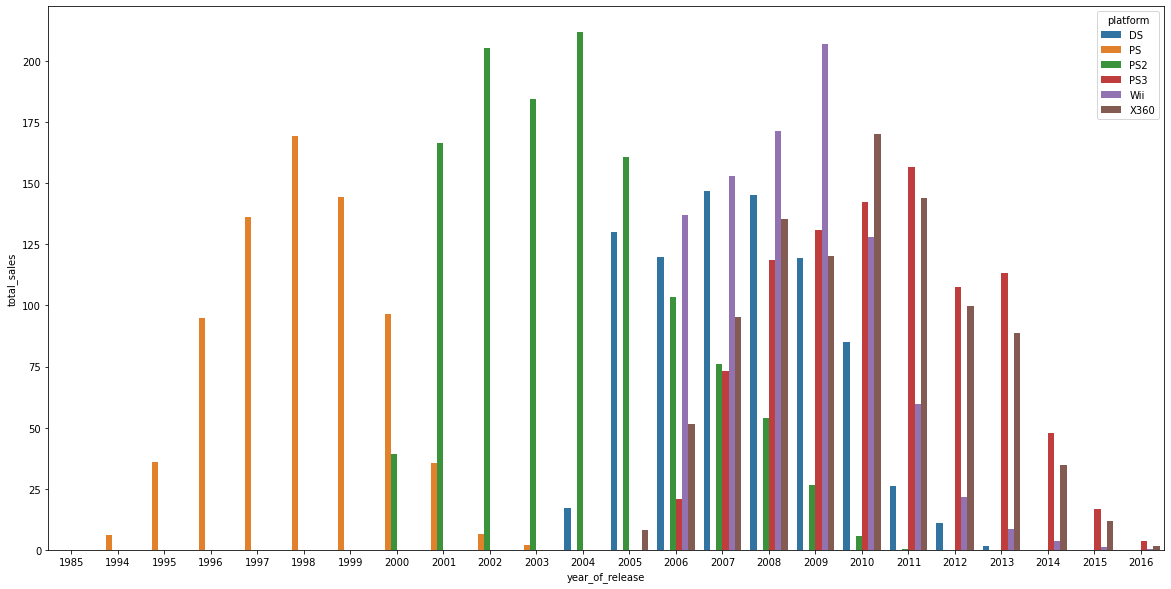

In [9]:
platforms_pivot = df.pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()

#Изменения продаж каждой платформы по годам
platforms_pivot_gross = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
platforms_pivot_gross = platforms_pivot_gross.sort_values(by = 'total_sales', ascending = False)
#Вывод: самые коммерчески успешные платфоррмы - PS2, X360, PS3, Wii, DS и PS.

top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
best = platforms_pivot.loc[platforms_pivot['platform'].isin(top_platforms)]
best_plot = sns.barplot(x = 'year_of_release', y = 'total_sales', hue = 'platform', data = best)#из графика видно, что 
#Наиболее успешные платформы в среднем живут около 10 лет
best_plot.figure.set_figheight(10)
best_plot.figure.set_figwidth(20)
display(platforms_pivot_gross)

In [10]:
best.groupby(['platform'])['year_of_release'].count()

platform
DS      11
PS      10
PS2     12
PS3     11
Wii     11
X360    12
Name: year_of_release, dtype: int64

#### Вывод
На основе проведенного анализа продаж по годам на различных платформах можно сделать следующие выводы:
1. Самые коммерчески успешные платфоррмы - PS2, X360, PS3, Wii, DS и PS
2. Наиболее успешные платформы в среднем живут 11 лет

### Определение актуального периода
В качестве актуального периода берем отрезок с 2012 по 2016 год. Данный отрезок выбран, поскольку кол-во ежегодно выпускаемых игр вышло на плато после бума в конце нулевых и составляет в среднем 577 игр в год.

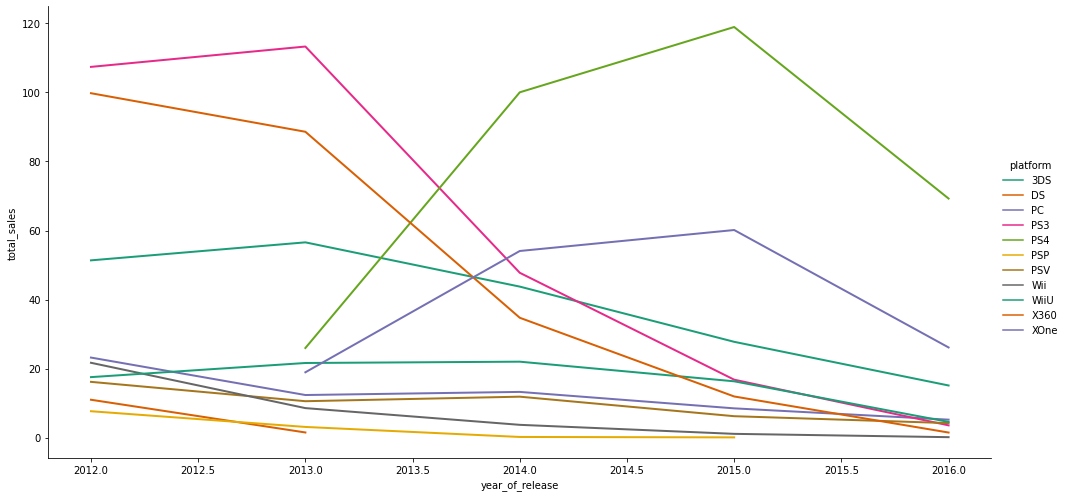

In [11]:
actual_data = df[df['year_of_release'] >= 2012].sort_values(by = 'total_sales', ascending=False)
actual_data_grouped = actual_data.groupby(['platform', 'year_of_release'])['total_sales'].agg('sum').reset_index()
actual_data_plot = sns.relplot(kind = 'line', data = actual_data_grouped, x = 'year_of_release', y = 'total_sales', hue = 'platform', height = 7, aspect = 2, palette = 'Dark2', linewidth = 2)
#actual_data_plot.fig.set_size_inches(20, 7)

Из предыдущего пункта мы выяснили, что средняя продолжительность жизни консоли составляет примерно 10 лет, поэтому на основе графика я бы выделил следующее: две консоли (PS4 и XOne) находятся лишь в начале своего жизненного цикла, обе
появились в 2013 году, и, не смотря на то, что обе показывает уменьшение кол-ва проданных игр по сравнению с прошлым годом,
на них определенно стоит обратить внимание.

### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.

,sum,median,mean
platform,,,
3DS,194.61,0.11,0.491439
DS,12.55,0.05,0.404839
PC,62.65,0.08,0.250600
PS3,288.79,0.20,0.585781
PS4,314.14,0.20,0.801378
PSP,11.19,0.03,0.064682
PSV,49.18,0.05,0.119659
Wii,35.37,0.18,0.655000
WiiU,82.19,0.22,0.559116


-------------------------------------


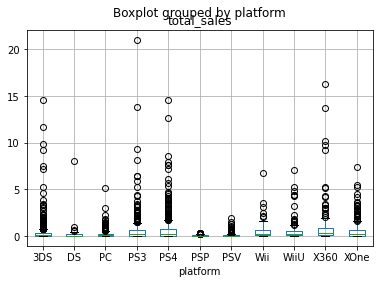

In [12]:
platforms_describe = actual_data.groupby('platform')['total_sales'].agg(['sum', 'median', 'mean'])
actual_data.boxplot("total_sales", by="platform")
platforms_describe.sort_values(by = 'median', ascending = False)
display(platforms_describe)
print('-------------------------------------')

#### Вывод
У каждой платформы график имеет схожее распределение со скошенностью вправо. В данном случае это означает то, что приставки больше всего продавались в начале своего жизненного цикла, иными словами, приставки больше всего продается в момент выхода на рынок, далее с каждым годом спрос снижается. Наибольший выброс у PS3 (21млн продаж игр в год), за ней на примерно одном уровне выбросов находятся сразу четыре платформы (3DS, PS3, PS4, X360) с выбросом в +-15 млн проданных копий за год. Наибольшая медиана по кол-ву проданных игр у X360, затем XONE и WiiU c медианой 0.22млн.

### Диаграмма рассеяния и корреляция между отзывами и продажами

#### Корреляция по всем платформам

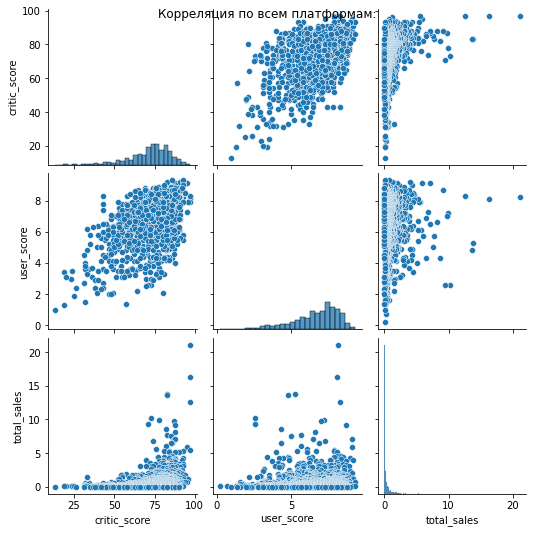

Корреляция по всем платформам:
               critic_score  user_score  total_sales
critic_score      1.000000    0.517727     0.308197
user_score        0.517727    1.000000     0.004429
total_sales       0.308197    0.004429     1.000000


In [13]:
corr_data = actual_data[['critic_score', 'user_score', 'total_sales']]
sns.pairplot(corr_data)
plt.suptitle('Корреляция по всем платформам:')
plt.show()
print('Корреляция по всем платформам:\n', corr_data.corr())

#### Корреляция между отзывами и продажами игр на PS4

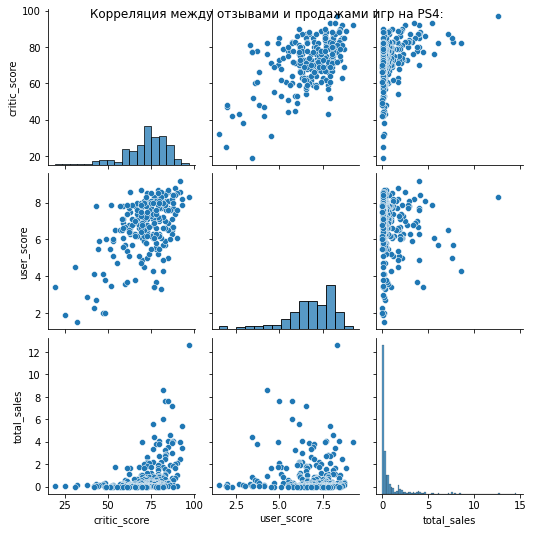

Корреляция между отзывами и продажами игр на PS4:
               critic_score  user_score  total_sales
critic_score      1.000000    0.557654     0.406568
user_score        0.557654    1.000000    -0.031957
total_sales       0.406568   -0.031957     1.000000


In [14]:
ps4_corr_data = actual_data.loc[actual_data['platform'] == 'PS4'][['critic_score', 'user_score', 'total_sales']]
sns.pairplot(ps4_corr_data)
plt.suptitle('Корреляция между отзывами и продажами игр на PS4:')
plt.show()
print('Корреляция между отзывами и продажами игр на PS4:\n', ps4_corr_data.corr())

##### Корреляция по всем платформам
Корреляция между отзывами критиков и продажами составляет 0.3, в то время как корреляция между отзывами пользователей и продажами можно сказать отсутствует, составляет всего 0.004. Таким образом можно сделать вывод, что большее влияние на кол-во проданных игр оказывают отзывы критиков. При этом, замечена корреляция между отзывами критиков и отзывами пользователей (0.51). Это можно объяснить тем, что довольно нередки случаи, когда и критики, и пользователи оценивают игру примерно одинаково. 

##### Корреляция между отзывами и продажами игр на PS4
В случае с PS4 можно сказать, что ситуация схожа с общим положением дел по всем платформам. Корреляция между продажами и оценками экспертов чуть выше, чем по всем платформам и составляет 0.4. Корреляция между продажами и оценками пользователей принимает такие околонулевые значения, как и в целом по платформам, однако имеет уже отрицательное значение -0.03

### Распределение игр по жанрам

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


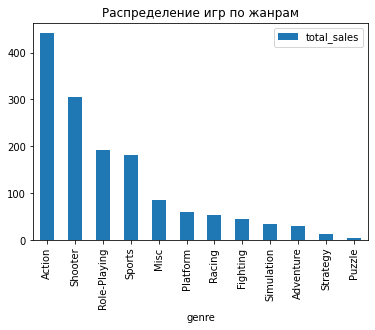

In [15]:
genres_grouped = actual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')\
    .sort_values(by = 'total_sales', ascending = False)
genres_grouped.plot(kind = 'bar', title = 'Распределение игр по жанрам')
genres_grouped

С большим отрывом по кол-ву проданных игр лидируют игры в жанре 'Action', затем 'Shooter', далее расположились практически на одном уровне игры в жанре 'Role-Playing' и 'Sports'. Из этого можно сделать вывод, что пользователям больше всего нравятся игры с большим кол-вом экшена и стрельбы. Меньше всего продаются игры в жанре 'Puzzle'.

## Составление портрета пользователя каждого региона

In [16]:
actual_data['rating'] = actual_data['rating'].fillna(value = 'No rating')
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,<NA>,No rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,<NA>,No rating,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16270,Hyakka Yakou,PSV,2015,Action,0.00,0.00,0.01,0.00,<NA>,<NA>,No rating,0.01
16273,Doki-Doki Universe,PSV,2013,Adventure,0.00,0.01,0.00,0.00,66,5.7,E10+,0.01
16276,Sangoku Koi Senki: Omoide Gaeshi - CS Edition,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,<NA>,No rating,0.01
16278,Princess Arthur,PSP,2013,Misc,0.00,0.00,0.01,0.00,<NA>,<NA>,No rating,0.01


### North America (NA)

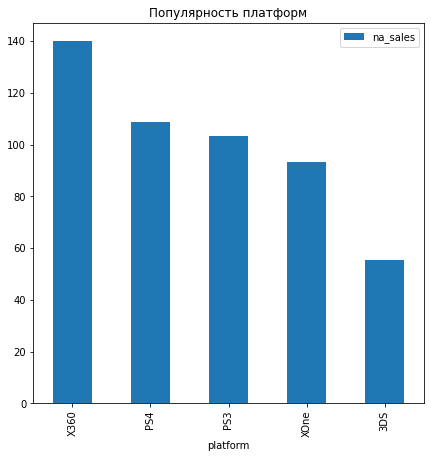

Топ-5 самых популярных платформ в Северной Америке:
           na_sales
platform          
X360        140.05
PS4         108.74
PS3         103.38
XOne         93.12
3DS          55.31

-----------------------------------------------



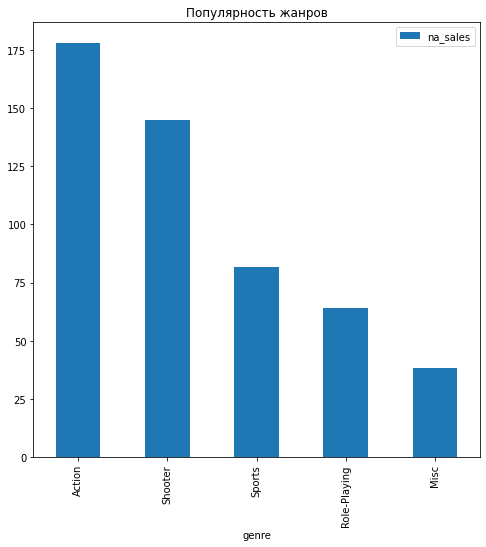

Топ-5 самых популярных жанров в Северной Америке:
               na_sales
genre                 
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19

-----------------------------------------------



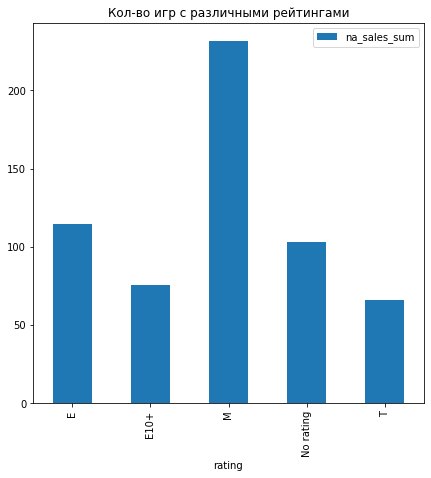

Распространенность игр по рейтингам:
            na_sales_sum  na_sales_count
rating                                 
M                231.57             454
E                114.37             297
No rating        103.31             354
E10+              75.70             266
T                 66.02             306


M            454
No rating    354
T            306
E            297
E10+         266
Name: rating, dtype: int64

In [17]:
#Самые популярные платформы (топ-5)
na_data = actual_data.loc[actual_data['na_sales'] > 0] #выделяем строки с ненулевыми продажами в Северной Америке
na_data_top5_platforms = na_data.pivot_table(index = 'platform', values = 'na_sales' ,aggfunc = 'sum')\
    .sort_values(by = 'na_sales', ascending = False)\
    .head(5)
na_data_top5_platforms.plot(kind = 'bar', y = 'na_sales', figsize = (7, 7), title = 'Популярность платформ')
plt.show()
print('Топ-5 самых популярных платформ в Северной Америке:\n', na_data_top5_platforms)

print()
print('-----------------------------------------------')
print()

#Самые популярные жанры (топ-5)
na_data_top5_genres = na_data.pivot_table(index = 'genre', values = 'na_sales' ,aggfunc = 'sum')\
    .sort_values(by = 'na_sales', ascending = False)\
    .head(5)
na_data_top5_genres.plot(kind = 'bar', y = 'na_sales', figsize = (8, 8), title = 'Популярность жанров')
plt.show()
print('Топ-5 самых популярных жанров в Северной Америке:\n', na_data_top5_genres)

print()
print('-----------------------------------------------')
print()

#Влияет ли рейтинг ESRB на продажи в данном регионе?
#na_data_drop_NA = na_data.drop(na_data[na_data['rating'].isna()].index)
na_data_pivot = na_data.pivot_table(index = 'rating', values = 'na_sales', aggfunc = ['sum', 'count'])
na_data_pivot.columns = ['na_sales_sum', 'na_sales_count'] 
na_data_pivot.plot(kind = 'bar', y = 'na_sales_sum', figsize = (7, 7), title = 'Кол-во игр с различными рейтингами')
plt.show()
print('Распространенность игр по рейтингам:\n', na_data_pivot.sort_values(ascending = False, by = 'na_sales_sum'))
na_data['rating'].value_counts()

#### Вывод
На основе проведенного анализа можно составить следующий портрет пользователя из Северной Америки:  
1. Больше всего нравятся приставки X360, PS4, PS3 и Xbox One
2. Любимый жанр экшен или шутер
3. Интересуется играми с оценкой M («Mature» — «От 17 лет»)

### Europe (EU)

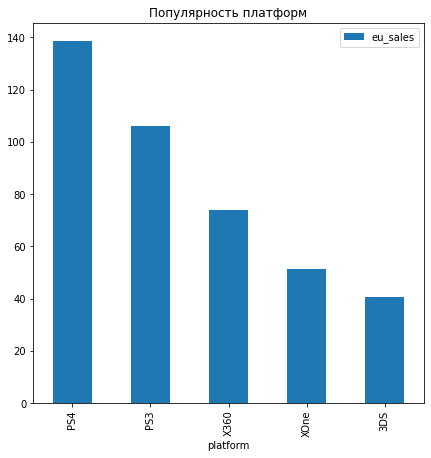

Топ-5 самых популярных платформ в Европе:
           eu_sales
platform          
PS4         138.66
PS3         106.04
X360         74.02
XOne         51.28
3DS          40.81

-----------------------------------------------



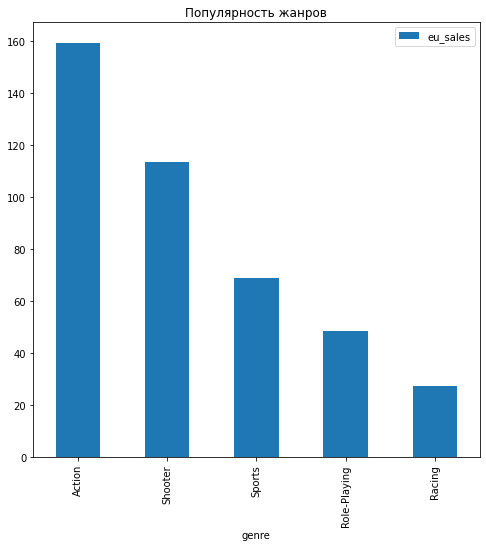

Топ-5 самых популярных жанров в Европе:
               eu_sales
genre                 
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29

-----------------------------------------------



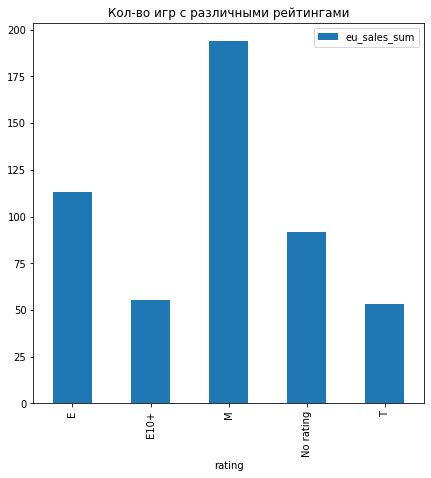

Распространенность игр по рейтингам:
            eu_sales_sum  eu_sales_count
rating                                 
M                193.96             459
E                113.03             336
No rating         91.50             417
E10+              55.37             281
T                 52.96             318


In [18]:
#Самые популярные платформы (топ-5)
eu_data = actual_data.loc[actual_data['eu_sales'] > 0] #выделяем строки с ненулевыми продажами в Европе
eu_data_top5_platforms = na_data.pivot_table(index = 'platform', values = 'eu_sales' ,aggfunc = 'sum')\
    .sort_values(by = 'eu_sales', ascending = False)\
    .head(5)
eu_data_top5_platforms.plot(kind = 'bar', y = 'eu_sales', figsize = (7, 7), title = 'Популярность платформ')
plt.show()
print('Топ-5 самых популярных платформ в Европе:\n', eu_data_top5_platforms)

print()
print('-----------------------------------------------')
print()

#Самые популярные жанры (топ-5)
eu_data_top5_genres = eu_data.pivot_table(index = 'genre', values = 'eu_sales' ,aggfunc = 'sum')\
    .sort_values(by = 'eu_sales', ascending = False)\
    .head(5)
eu_data_top5_genres.plot(kind = 'bar', y = 'eu_sales', figsize = (8, 8), title = 'Популярность жанров')
plt.show()
print('Топ-5 самых популярных жанров в Европе:\n', eu_data_top5_genres)

print()
print('-----------------------------------------------')
print()

#Влияет ли рейтинг ESRB на продажи в данном регионе?
#eu_data_drop_NA = eu_data.drop(eu_data[eu_data['rating'].isna()].index)
eu_data_pivot = eu_data.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = ['sum', 'count'])
eu_data_pivot.columns = ['eu_sales_sum', 'eu_sales_count'] 
eu_data_pivot.plot(kind = 'bar', y = 'eu_sales_sum', figsize = (7, 7), title = 'Кол-во игр с различными рейтингами')
plt.show()
print('Распространенность игр по рейтингам:\n', eu_data_pivot.sort_values(ascending = False, by = 'eu_sales_sum'))

#### Вывод
На основе проведенного анализа можно составить следующий портрет пользователя из Европы:

1. В Европе пользователю больше нравятся приставки от компании Sony. Так, наиболее популярными среди пользователей являются PS4, PS3
2. Любимый жанр экшен или шутер
3. Интересуется играми с оценкой M («Mature» — «От 17 лет»)

### Japan (JP)

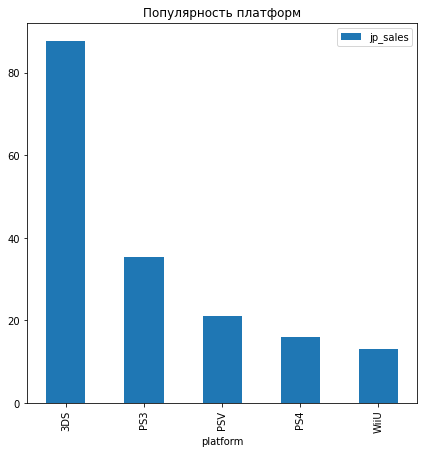

Топ-5 самых популярных платформ в Японии:
           jp_sales
platform          
3DS          87.79
PS3          35.29
PSV          21.04
PS4          15.96
WiiU         13.01

-----------------------------------------------



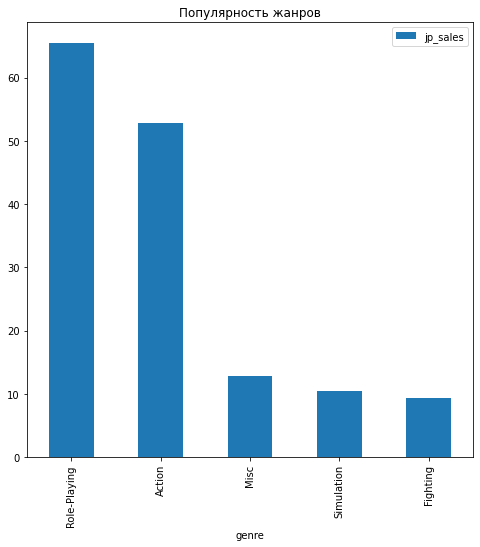

Топ-5 самых популярных жанров в Японии:
               jp_sales
genre                 
Role-Playing     65.44
Action           52.80
Misc             12.86
Simulation       10.41
Fighting          9.44

-----------------------------------------------



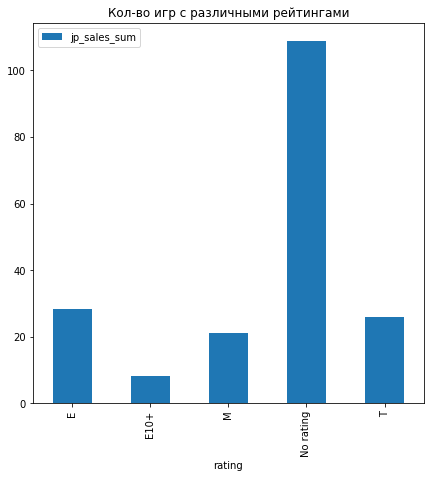

Распространенность игр по рейтингам:
            jp_sales_sum  jp_sales_count
rating                                 
No rating        108.84             942
E                 28.33             105
T                 26.02             228
M                 21.20             227
E10+               8.19              67


In [19]:
#Самые популярные платформы (топ-5)
jp_data = actual_data.loc[actual_data['jp_sales'] > 0] #выделяем строки с ненулевыми продажами в Европе
jp_data_top5_platforms = jp_data.pivot_table(index = 'platform', values = 'jp_sales' ,aggfunc = 'sum')\
    .sort_values(by = 'jp_sales', ascending = False)\
    .head(5)
jp_data_top5_platforms.plot(kind = 'bar', y = 'jp_sales', figsize = (7, 7), title = 'Популярность платформ')
plt.show()
print('Топ-5 самых популярных платформ в Японии:\n', jp_data_top5_platforms)

print()
print('-----------------------------------------------')
print()

#Самые популярные жанры (топ-5)
jp_data_top5_genres = jp_data.pivot_table(index = 'genre', values = 'jp_sales' ,aggfunc = 'sum')\
    .sort_values(by = 'jp_sales', ascending = False)\
    .head(5)
jp_data_top5_genres.plot(kind = 'bar', y = 'jp_sales', figsize = (8, 8), title = 'Популярность жанров')
plt.show()
print('Топ-5 самых популярных жанров в Японии:\n', jp_data_top5_genres)

print()
print('-----------------------------------------------')
print()

#Влияет ли рейтинг ESRB на продажи в данном регионе?
#jp_data_drop_NA = jp_data.drop(jp_data[jp_data['rating'].isna()].index)
jp_data_pivot = jp_data.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = ['sum', 'count'])
jp_data_pivot.columns = ['jp_sales_sum', 'jp_sales_count'] 
jp_data_pivot.plot(kind = 'bar', y = 'jp_sales_sum', figsize = (7, 7), title = 'Кол-во игр с различными рейтингами')
plt.show()
print('Распространенность игр по рейтингам:\n', jp_data_pivot.sort_values(ascending = False, by = 'jp_sales_sum'))

Япония еще больше подтвердила свою уникальность, у нее большую часть всех проданных игр составляют игры без рейтинга. Для данного региона рейтинг ESRB необязателен. В Японии действует своя рейтинговая система CERO. Причиной этого может быть, что вкус японцев и их игровая культура сильно отличаются от западных. 

#### Вывод
На основе проведенного анализа можно составить следующий портрет пользователя из Японии:

1. Нибольшим спросом пользуются приставки 3DS от местного производителя, компании Nintendo. Игровые приставки от Microsoft наоборот, практически не представлены.
2. Любимый жанр - ролевые игры и экшен
3. Имеются три наиболее распространенных рейтинга: E(«Everyone») — «Для всех», T(«Teen») — «Подросткам 13—19 лет» и M(«Mature») — «От 17 лет»

### Общий вывод
Пользователи из Северной Америки и Европы в основном схожи: полбзуются одними и теми же приставками, любят одни и те же жанры в играх. А вот пользователи из Японии, наоборот, имеют довольно сильную индивидуальность.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Гипотеза формулируется следующим образом:  
H0 - средние пользовательские рейтинги платформ Xbox One и PC равны  
H1 - средние пользовательские рейтинги платформ Xbox One и PC неравны

In [20]:
xboxone_data = actual_data.loc[actual_data['platform'] == 'XOne'] #создаем фрейм данных по данным xbox
xboxone_data = xboxone_data.drop(xboxone_data[xboxone_data['user_score'].isna()].index) #избавляемся от пропущенных значений
xboxone_data = xboxone_data['user_score'] #оставляем один столбец
pc_data = actual_data.loc[actual_data['platform'] == 'PC'] #создаем фрейм данных по данным pc
pc_data = pc_data.drop(pc_data[pc_data['user_score'].isna()].index) #избавляемся от пропущенных значений
pc_data = pc_data['user_score'] #оставляем один столбец

print('Среднее значение пользовательских оценок на PC = ' ,pc_data.mean())
print('Среднее значение пользовательских оценок на Xbox One = ' ,xboxone_data.mean())
print('Разница между средними = ', round(abs(pc_data.mean() - xboxone_data.mean()), 3))

alpha = .05

results = st.ttest_ind(xboxone_data, pc_data)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Среднее значение пользовательских оценок на PC =  6.428640776699029
Среднее значение пользовательских оценок на Xbox One =  6.521428571428572
Разница между средними =  0.093
p-значение: 0.5535080500643738
Не получилось отвергнуть нулевую гипотезу


#### Вывод
Полученное значение p = 0.55 является больше установленного уровня значимости, поэтому делаем вывод о том, что нулевая гипотеза не отвергается, и, следовательно, средние пользовательские рейтинги платформ Xbox One и PC равны.

### Средние пользовательские рейтинги жанров Action  и Sports разные
Гипотеза формулируется следующим образом:  
H0 - средние пользовательские рейтинги жанров Action  и Sports равны  
H1 - средние пользовательские рейтинги жанров Action  и Sports неравны

In [21]:
action_data = actual_data.loc[actual_data['genre'] == 'Action'] #создаем фрейм данных по жанру Action
action_data = action_data.drop(action_data[action_data['user_score'].isna()].index) #избавляемся от пропущенных значений
action_data = action_data['user_score'] #оставляем один столбец
sports_data = actual_data.loc[actual_data['genre'] == 'Sports'] #создаем фрейм данных по жанру Sports
sports_data = sports_data.drop(sports_data[sports_data['user_score'].isna()].index) #избавляемся от пропущенных значений
sports_data = sports_data['user_score'] #оставляем один столбец

print('Среднее значение пользовательских оценок по жанру Action = ' ,action_data.mean())
print('Среднее значение пользовательских оценок по жанру Sports = ' ,sports_data.mean())
print('Разница между средними = ', round(abs(action_data.mean() - sports_data.mean()), 3))

alpha = .05

results = st.ttest_ind(action_data, sports_data)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Среднее значение пользовательских оценок по жанру Action =  6.825047801147227
Среднее значение пользовательских оценок по жанру Sports =  5.455897435897437
Разница между средними =  1.369
p-значение: 3.7163089460900504e-26
Отвергаем нулевую гипотезу


#### Вывод
Полученное P-значение является крайне малым и говорит о том, что мы отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports равны и считаем, что средние пользовательские рейтинги жанров Action и Sports разные. Разницу между средними оценками пользователей признаем статистически значимой, поскольку получение такой разницы случайно крайне маловерятно.

# Вывод

##### В ходе работы с данными были проделаны следующие действия:
1. Выполнена предобработка данных (изменены названия столбцов, изменены типы данных некоторых столбцов). Также, были замечены пропуски в столбцах 'name', 'year_of_release', 'critic_score', 'user_score', 'rating', в 'user_score' были заменены значения 'tbd' на пропуски.
2. Посчитано количество игр, которые выходили в каждый год с 1980 по 2016 год. Кол-во выпускаемых игр росло вплоть до 2008 года, после чего пошло на спад. С 2011 по 2012 обнаружена просадка почти в два раза, в 2011 - 1136 выпущенных игр, в 2012 - всего 653.
3. Выделены наиболее коммерчески успешные платформы: PS2, X360, PS3, Wii, DS и PS
4. Определен жизненный цикл платформы ~ 10 лет
5. Определен актуальный период. Это период с 2012 года по 2016.
6. Посчитана и сравнена корреляция между отзывами критиков и игроков на продажи игр на PS4, а также в целом по всем платформам. Корреляция между отзывами критиков и продажи игр имеется и составляет 0.3 по всем платформам и 0.4 на PS4, а вот корреляция между отзывами игркоов и продажами отсутствует и там, и там.
7. Выделены наиболее популярные жанры - экшен и шутер
8. Составлены портреты пользователей из каждого региона. Пользователи из Северной Америки и Европы в основном схожи, а вот пользователи из Японии, наоборот, имеют довольно сильную индивидуальность.
9. Проверена гипотеза о равенстве среднего пользовательского рейтинга платформ Xbox One и PC. Гипотезу принимаем и считаем средний пользовательский рейтинга платформ Xbox One и PC равным.
10. Проверена гипотеза о равенстве среднего пользовательского рейтинга в жанрах Action и Sports. Гипотезу отвергаем и признаем пользовательские рейтинги жанров Action и Sports отличными. 

##### Также, задачей проекта ставилось выявление закономерностей, определяющих успешность игры. Были выделены следующие факторы:
1. Регион
2. Платформа
3. Отзывы экспертов
4. Жанр игры
5. Рейтинг ESRB